In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [177]:
## Lendo os arquivos das tabela de atributos dos shapefiles

geoq_ibicarai = pd.read_excel(r'C:\Nova pasta\Documents\tcc\geoquimica_ibicarai.xlsx')
geoq_itabuna = pd.read_excel(r'C:\Nova pasta\Documents\tcc\geoquimica_itabuna.xlsx')

In [178]:
## Concatenando as duas tabelas de atributo (Itabuna e Ibicaraí)

pontos_geoquimica = pd.concat([geoq_ibicarai,geoq_itabuna])

In [179]:
## Lendo as análises geoquímicas de rochas e sedimentos

ibicarai_sedimento = pd.read_excel(r'C:\Nova pasta\Documents\tcc\Itabuna-Ibicarai - Folha Ibicarai - Geoquimica Sedimento de Corrente.xlsx')
itabuna_sedimento = pd.read_excel(r'C:\Nova pasta\Documents\tcc\Itabuna-Ibicarai - Folha Itabuna - Geoquimica Sedimento de Corrente.xlsx')


In [180]:
sedimento = pd.concat([ibicarai_sedimento,itabuna_sedimento])
sedimento

,projeto_amostragem,projeto_publicacao,centro_custo,classe,num_campo,num_lab,data_visita,abertura,leitura,job,...,Sc_ppm,Sn_ppm,Sr_ppm,Ti_pct,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm,observacao
0,Itabuna-Ibicarai - Folha Ibicarai,Itabuna-Ibicarai - Folha Ibicarai,1014350,Sedimento de Corrente,1014-CB-S-0001,HDZ808,1987-02-01,HNO3 a Quente,Absorção Atômica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
1,Itabuna-Ibicarai - Folha Ibicarai,Itabuna-Ibicarai - Folha Ibicarai,1014350,Sedimento de Corrente,1014-CB-S-0001,HDZ808,1987-02-01,Semiquantitativa,Medidor de Íon Específico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Itabuna-Ibicarai - Folha Ibicarai,Itabuna-Ibicarai - Folha Ibicarai,1014350,Sedimento de Corrente,1014-CB-S-0001,HDZ808,1987-02-01,NaN,Espectrografia Ótica de Emissão,NaN,...,5,ND,ND,>1,30,ND,30,ND,>1000,NaN
3,Itabuna-Ibicarai - Folha Ibicarai,Itabuna-Ibicarai - Folha Ibicarai,1014350,Sedimento de Corrente,1014-CB-S-0001R,HDZ809,1987-02-01,HNO3 a Quente,Absorção Atômica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
4,Itabuna-Ibicarai - Folha Ibicarai,Itabuna-Ibicarai - Folha Ibicarai,1014350,Sedimento de Corrente,1014-CB-S-0001R,HDZ809,1987-02-01,Semiquantitativa,Medidor de Íon Específico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,Itabuna-Ibicarai - Folha Itabuna,Itabuna-Ibicarai - Folha Itabuna,1015350,Sedimento de Corrente,1015-VB-S-0129,HEA870,1987-03-01,Semiquantitativa,Medidor de Íon Específico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,Itabuna-Ibicarai - Folha Itabuna,Itabuna-Ibicarai - Folha Itabuna,1015350,Sedimento de Corrente,1015-VB-S-0129,HEA870,1987-03-01,NaN,Espectrografia Ótica de Emissão,NaN,...,10,ND,ND,>1,50,ND,30,ND,>1000,NaN
1548,Itabuna-Ibicarai - Folha Itabuna,Itabuna-Ibicarai - Folha Itabuna,1015350,Sedimento de Corrente,1015-VB-S-0131,HEA871,1987-03-01,HNO3 a Quente,Absorção Atômica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
1549,Itabuna-Ibicarai - Folha Itabuna,Itabuna-Ibicarai - Folha Itabuna,1015350,Sedimento de Corrente,1015-VB-S-0131,HEA871,1987-03-01,Semiquantitativa,Medidor de Íon Específico,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
sedimento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 0 to 1550
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   projeto_amostragem  3129 non-null   object        
 1   projeto_publicacao  3129 non-null   object        
 2   centro_custo        3129 non-null   int64         
 3   classe              3129 non-null   object        
 4   num_campo           3129 non-null   object        
 5   num_lab             3129 non-null   object        
 6   data_visita         3129 non-null   datetime64[ns]
 7   abertura            2086 non-null   object        
 8   leitura             3129 non-null   object        
 9   job                 0 non-null      float64       
 10  Ag_ppm              1043 non-null   object        
 11  As_ppm              1043 non-null   object        
 12  Au_ppm              1043 non-null   object        
 13  B_ppm               1043 non-null   object      

In [182]:
## Selecionando as variáveis que serão usadas (ou não)

pt_geoq = pontos_geoquimica[['Num_Campo','Area','OS','Lat','Long','MatColetad','FonteAmost','Situacao','IntemRocha','DescRocha']]
pt_geoq

,Num_Campo,Area,OS,Lat,Long,MatColetad,FonteAmost,Situacao,IntemRocha,DescRocha
0,1014-EW-S-0125,Ibicaraí,6210,-14.519772,-39.542462,Aluviao,NaN,Leito seco,NaN,NaN
1,1014-RV-S-0056,Ibicaraí,6210,-14.626616,-39.647642,Aluviao,Rio,Leito Ativo Abaixo do Nivel d'agua,NaN,NaN
2,1014-RV-S-0069R,Ibicaraí,6210,-14.704158,-39.568828,Aluviao,Rio,Leito Ativo Abaixo do Nivel d'agua,NaN,NaN
3,1014-CB-S-0022R,Ibicaraí,6210,-14.628340,-39.950269,Aluviao,Rio,Leito Ativo Abaixo do Nivel d'agua,NaN,NaN
4,1014-CB-S-0023,Ibicaraí,6210,-14.616909,-39.975810,Aluviao,Rio,Leito Ativo Abaixo do Nivel d'agua,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
804,1015-VB-S-0126,Itabuna,6220,-14.898313,-39.080883,Aluviao,Rio,Leito Ativo ao Nivel d'agua,NaN,NaN
805,1015-VB-S-0127,Itabuna,6220,-14.896503,-39.083672,Aluviao,Rio,Leito Ativo ao Nivel d'agua,NaN,NaN
806,1015-VB-S-0128,Itabuna,6220,-14.895600,-39.080882,Aluviao,Rio,Leito Ativo ao Nivel d'agua,NaN,NaN
807,1015-VB-S-0129,Itabuna,6220,-14.915489,-39.085538,Aluviao,Rio,Leito Ativo ao Nivel d'agua,NaN,NaN


In [183]:
sedimento.columns

Index(['projeto_amostragem', 'projeto_publicacao', 'centro_custo', 'classe',
       'num_campo', 'num_lab', 'data_visita', 'abertura', 'leitura', 'job',
       'Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ', 'Be_ppm ',
       'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ', 'Cu_ppm ',
       'F_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ', 'Mo_ppm ',
       'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ', 'Sn_ppm ',
       'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ', 'Zn_ppm ',
       'Zr_ppm ', 'observacao'],
      dtype='object')

In [184]:
sedimentos = sedimento[['num_campo','leitura','abertura','Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ', 'Be_ppm ',
       'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ', 'Cu_ppm ',
       'F_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ', 'Mo_ppm ',
       'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ', 'Sn_ppm ',
       'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ', 'Zn_ppm ',
       'Zr_ppm ']]

In [185]:
#Filtro leitura sedimentos:

sedimentos_absorcao = sedimentos.leitura == 'Absorção Atômica  '
sedimentos_espectrografia = sedimentos['leitura']=='Espectrografia Ótica de Emissão  '
sedimentos_medidor = sedimentos['leitura']=='Medidor de Íon Específico '

s_abs = sedimentos[sedimentos_absorcao]
s_esp = sedimentos[sedimentos_espectrografia]
s_med = sedimentos[sedimentos_medidor]


In [186]:
sedimentos.leitura.unique()

array(['Absorção Atômica  ', 'Medidor de Íon Específico ',
       'Espectrografia Ótica de Emissão  '], dtype=object)

In [187]:
zn_sed = s_abs[['num_campo','Zn_ppm ']]
f_sed = s_med[['num_campo','F_ppm ']]
esp_sed = s_esp[['num_campo', 'Ag_ppm ', 'As_ppm ', 'Au_ppm ',
       'B_ppm ', 'Ba_ppm ', 'Be_ppm ', 'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ',
       'Co_ppm ', 'Cr_ppm ', 'Cu_ppm ', 'Fe_pct   ', 'La_ppm ',
       'Mg_pct   ', 'Mn_ppm ', 'Mo_ppm ', 'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ',
       'Sb_ppm ', 'Sc_ppm ', 'Sn_ppm ', 'Sr_ppm ', 'Ti_pct   ', 'V_ppm ',
       'W_ppm ', 'Y_ppm ', 'Zr_ppm ']]

In [188]:
### Merge
mg1 = pd.merge(esp_sed,f_sed,how='left',on='num_campo')
mg2 = pd.merge(mg1,zn_sed,how='left',on='num_campo')

In [189]:
mg2.columns

Index(['num_campo', 'Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ',
       'Be_ppm ', 'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ',
       'Cu_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ', 'Mo_ppm ',
       'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ', 'Sn_ppm ',
       'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ', 'Zr_ppm ',
       'F_ppm ', 'Zn_ppm '],
      dtype='object')

In [190]:
sedimentos_trat = mg2[['num_campo', 'Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ',
       'Be_ppm ', 'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ',
       'Cu_ppm ','F_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ', 'Mo_ppm ',
       'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ', 'Sn_ppm ',
       'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ','Zn_ppm ','Zr_ppm ','Zn_ppm ']]

In [191]:
sedimentos_trat.columns

Index(['num_campo', 'Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ',
       'Be_ppm ', 'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ',
       'Cu_ppm ', 'F_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ',
       'Mo_ppm ', 'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ',
       'Sn_ppm ', 'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ',
       'Zn_ppm ', 'Zr_ppm ', 'Zn_ppm '],
      dtype='object')

In [192]:
elm = ['Ag_ppm ', 'As_ppm ', 'Au_ppm ', 'B_ppm ', 'Ba_ppm ',
       'Be_ppm ', 'Bi_ppm ', 'Ca_pct   ', 'Cd_ppm ', 'Co_ppm ', 'Cr_ppm ',
       'Cu_ppm ', 'F_ppm ', 'Fe_pct   ', 'La_ppm ', 'Mg_pct   ', 'Mn_ppm ',
       'Mo_ppm ', 'Nb_ppm ', 'Ni_ppm ', 'Pb_ppm ', 'Sb_ppm ', 'Sc_ppm ',
       'Sn_ppm ', 'Sr_ppm ', 'Ti_pct   ', 'V_ppm ', 'W_ppm ', 'Y_ppm ',
       'Zn_ppm ', 'Zr_ppm ', 'Zn_ppm ']

In [193]:
for x in elm:
    
    sedimentos_trat[f'{x}'] = pd.to_numeric(sedimentos_trat[f'{x}'], errors='coerce')

<ipython-input-193-deff9fa247f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedimentos_trat[f'{x}'] = pd.to_numeric(sedimentos_trat[f'{x}'], errors='coerce')


TypeError: arg must be a list, tuple, 1-d array, or Series

In [194]:
sedimentos_trat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num_campo  1043 non-null   object 
 1   Ag_ppm     6 non-null      float64
 2   As_ppm     0 non-null      float64
 3   Au_ppm     0 non-null      float64
 4   B_ppm      125 non-null    float64
 5   Ba_ppm     1034 non-null   float64
 6   Be_ppm     39 non-null     float64
 7   Bi_ppm     3 non-null      float64
 8   Ca_pct     883 non-null    float64
 9   Cd_ppm     0 non-null      float64
 10  Co_ppm     1028 non-null   float64
 11  Cr_ppm     1036 non-null   float64
 12  Cu_ppm     997 non-null    float64
 13  F_ppm      805 non-null    float64
 14  Fe_pct     1043 non-null   float64
 15  La_ppm     975 non-null    float64
 16  Mg_pct     1041 non-null   float64
 17  Mn_ppm     1017 non-null   float64
 18  Mo_ppm     3 non-null      float64
 19  Nb_ppm     489 non-null    float64
 20  Ni_ppm  

In [195]:
# localização amostras
loc = pontos_geoquimica[['Num_Campo','Lat', 'Long']]
loc.rename(columns = {'Num_Campo':'num_campo'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [196]:
sedimentos_trat.isna().sum()

num_campo       0
Ag_ppm       1037
As_ppm       1043
Au_ppm       1043
B_ppm         918
Ba_ppm          9
Be_ppm       1004
Bi_ppm       1040
Ca_pct        160
Cd_ppm       1043
Co_ppm         15
Cr_ppm          7
Cu_ppm         46
F_ppm         238
Fe_pct          0
La_ppm         68
Mg_pct          2
Mn_ppm         26
Mo_ppm       1040
Nb_ppm        554
Ni_ppm         60
Pb_ppm        220
Sb_ppm       1042
Sc_ppm        155
Sn_ppm       1018
Sr_ppm        424
Ti_pct        956
V_ppm           3
W_ppm        1043
Y_ppm         231
Zn_ppm          0
Zr_ppm          0
Zn_ppm          0
dtype: int64

In [197]:
sedimentos_trat

,num_campo,Ag_ppm,As_ppm,Au_ppm,B_ppm,Ba_ppm,Be_ppm,Bi_ppm,Ca_pct,Cd_ppm,...,Sc_ppm,Sn_ppm,Sr_ppm,Ti_pct,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm,Zn_ppm
0,1014-CB-S-0001,NaN,NaN,NaN,NaN,300.0,NaN,NaN,0.20,NaN,...,5.0,NaN,NaN,NaN,30.0,NaN,30.0,7,>1000,7
1,1014-CB-S-0001R,NaN,NaN,NaN,NaN,500.0,NaN,NaN,0.20,NaN,...,5.0,NaN,NaN,NaN,50.0,NaN,50.0,9,>1000,9
2,1014-CB-S-0003,NaN,NaN,NaN,NaN,700.0,NaN,NaN,0.30,NaN,...,5.0,NaN,NaN,NaN,50.0,NaN,30.0,30,>1000,30
3,1014-CB-S-0004,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,0.30,NaN,...,15.0,NaN,100.0,NaN,30.0,NaN,30.0,24,>1000,24
4,1014-CB-S-0005,NaN,NaN,NaN,NaN,300.0,NaN,NaN,0.15,NaN,...,15.0,NaN,NaN,NaN,50.0,NaN,30.0,10,>1000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1015-VB-S-0126,NaN,NaN,NaN,30.0,150.0,NaN,NaN,0.10,NaN,...,15.0,NaN,NaN,NaN,50.0,NaN,20.0,22,>1000,22
1039,1015-VB-S-0127,NaN,NaN,NaN,50.0,30.0,NaN,NaN,0.10,NaN,...,7.0,NaN,NaN,NaN,30.0,NaN,10.0,13,>1000,13
1040,1015-VB-S-0128,NaN,NaN,NaN,30.0,150.0,NaN,NaN,0.30,NaN,...,10.0,NaN,NaN,NaN,50.0,NaN,50.0,80,>1000,80
1041,1015-VB-S-0129,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,50.0,NaN,30.0,12,>1000,12


In [198]:
analise_sed = sedimentos_trat[['num_campo','Ba_ppm ',
       'Co_ppm ', 'Cr_ppm ','Ni_ppm ',
       'Cu_ppm ','Fe_pct   ','Mg_pct   ', 'Mn_ppm ',
       'V_ppm ',
       ]]

In [199]:
analise_sed

,num_campo,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0
...,...,...,...,...,...,...,...,...,...,...
1038,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0
1039,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0
1040,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0
1041,1015-VB-S-0129,100.0,7.0,50.0,5.0,10.0,3.0,0.05,300.0,50.0


In [200]:
analise_sed = analise_sed.dropna(axis=0, how='any')

In [201]:
analise_sed

,num_campo,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0
...,...,...,...,...,...,...,...,...,...,...
1037,1015-VB-S-0125,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0
1038,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0
1039,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0
1040,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0


<AxesSubplot:>

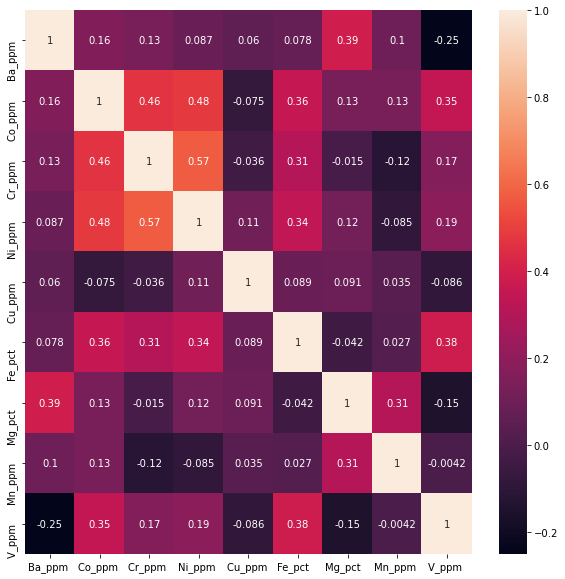

In [202]:
corr = analise_sed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [203]:
from sklearn.cluster import KMeans

In [204]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [205]:
X = analise_sed.drop(['num_campo'], axis = 1)

In [206]:
y = analise_sed.num_campo

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
standardx = scaler.transform(X)

In [208]:
X

,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm
0,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0
1,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0
2,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0
3,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0
4,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0
...,...,...,...,...,...,...,...,...,...
1037,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0
1038,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0
1039,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0
1040,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0


In [209]:
stnd = pd.DataFrame(standardx)

In [210]:
stnd.columns = ['Ba_ppm ',
       'Co_ppm ', 'Cr_ppm ','Ni_ppm ',
       'Cu_ppm ','Fe_pct   ','Mg_pct   ', 'Mn_ppm ',
       'V_ppm ']


In [211]:
stnd

,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm
0,-0.557570,-1.215736,-0.448124,-0.457153,-0.434083,-0.755790,-0.793666,0.668204,-1.263031
1,-0.190735,-0.971646,0.746103,-0.457153,2.009456,-0.207421,-0.619374,1.289982,-0.884556
2,0.176101,-0.564830,-0.815578,-0.791200,-0.434083,-0.207421,-0.445082,2.533539,-0.884556
3,0.726355,-0.971646,-0.815578,-0.991629,-0.211943,-0.207421,-0.619374,2.533539,-1.263031
4,-0.557570,-0.971646,-0.448124,-0.457153,2.009456,-0.207421,-0.793666,0.668204,-0.884556
...,...,...,...,...,...,...,...,...,...
910,0.176101,0.655619,-0.172533,-0.457153,0.232337,-0.207421,1.297836,0.668204,0.061631
911,-0.832697,-0.971646,-0.815578,-0.791200,-0.434083,-0.207421,-0.619374,-0.326641,-0.884556
912,-1.052799,-1.215736,-0.815578,-0.791200,-0.789507,-0.207421,-0.793666,-0.326641,-1.263031
913,-0.832697,-1.215736,-0.815578,-0.791200,-0.656223,-0.207421,-0.619374,-0.326641,-0.884556


In [212]:
kmeans.fit(stnd)

KMeans(n_clusters=4, random_state=0)

In [213]:
kmeans.labels_

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 0, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 2, 2, 0, 0, 2, 3, 0, 0, 2, 2, 3, 2,
       0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2,

In [214]:
analise_sed['K-classes'] = kmeans.labels_

<ipython-input-214-f90dee7e306b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analise_sed['K-classes'] = kmeans.labels_


In [153]:
analise_sed

,num_campo,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm,K-classes
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0,1
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0,1
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0,0
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0,0
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,1015-VB-S-0125,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0,0
1038,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0,1
1039,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0,1
1040,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0,1


In [215]:
k_shapes = pd.merge(analise_sed,loc, how='left', on='num_campo' )


In [216]:
k_shapes.columns

Index(['num_campo', 'Ba_ppm ', 'Co_ppm ', 'Cr_ppm ', 'Ni_ppm ', 'Cu_ppm ',
       'Fe_pct   ', 'Mg_pct   ', 'Mn_ppm ', 'V_ppm ', 'K-classes', 'Lat',
       'Long'],
      dtype='object')

In [217]:
k_shapes.columns = ['Amostra', 'Ba (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Ni (ppm)', 'Cu (ppm)',
       'Fe (%)', 'Mg (%)', 'Mn (ppm)', 'V (ppm)', 'Clusters', 'Latitude',
       'Longitude']

In [160]:
k_shapes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 914
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Amostra    915 non-null    object 
 1   Ba (ppm)   915 non-null    float64
 2   Co (ppm)   915 non-null    float64
 3   Cr (ppm)   915 non-null    float64
 4   Ni (ppm)   915 non-null    float64
 5   Cu (ppm)   915 non-null    float64
 6   Fe (%)     915 non-null    float64
 7   Mg (%)     915 non-null    float64
 8   Mn (ppm)   915 non-null    float64
 9   V (ppm)    915 non-null    float64
 10  Clusters   915 non-null    int32  
 11  Latitude   915 non-null    float64
 12  Longitude  915 non-null    float64
dtypes: float64(11), int32(1), object(1)
memory usage: 96.5+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

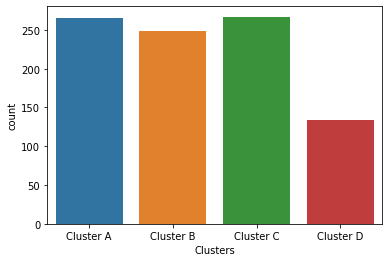

In [221]:
sns.countplot(df['Clusters'])

<AxesSubplot:xlabel='Clusters', ylabel='Mn (ppm)'>

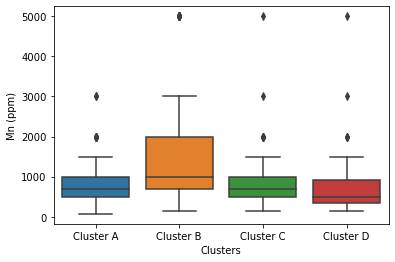

In [222]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Mn (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Cu (ppm)'>

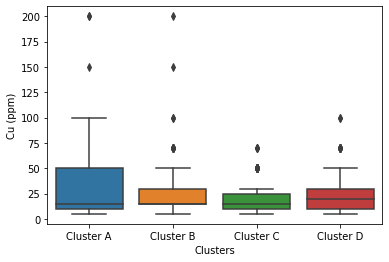

In [223]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Cu (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Ba (ppm)'>

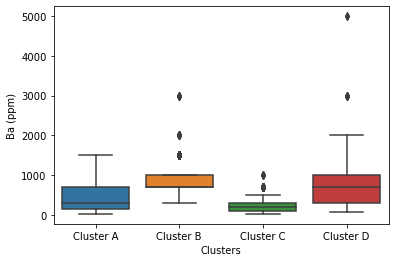

In [224]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Ba (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Fe (%)'>

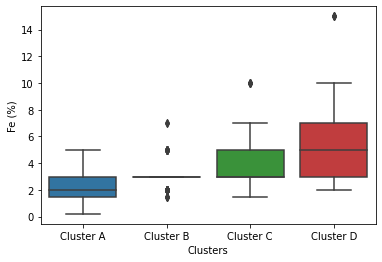

In [225]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Fe (%)'])

<AxesSubplot:xlabel='Clusters', ylabel='Mg (%)'>

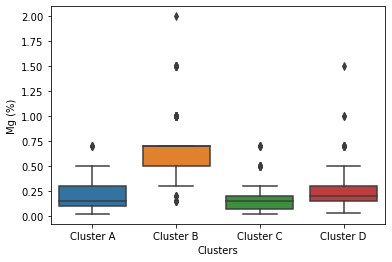

In [226]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Mg (%)'])

<AxesSubplot:xlabel='Clusters', ylabel='V (ppm)'>

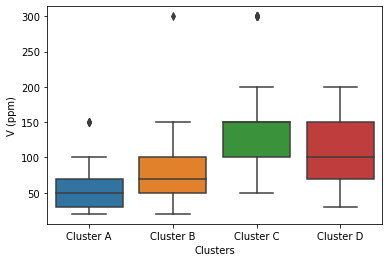

In [227]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['V (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Co (ppm)'>

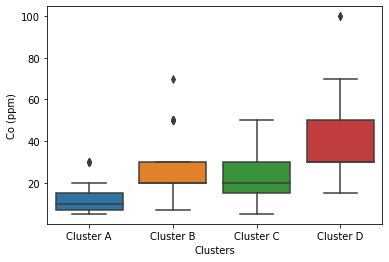

In [228]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Co (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Ni (ppm)'>

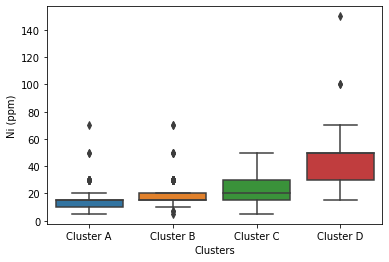

In [229]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Ni (ppm)'])

<AxesSubplot:xlabel='Clusters', ylabel='Cr (ppm)'>

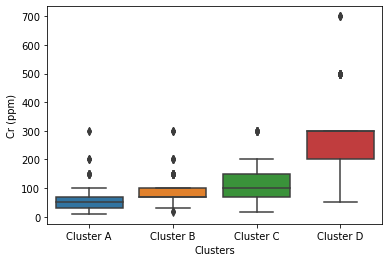

In [230]:
sns.boxplot(x=df['Clusters'] , y=k_shapes['Cr (ppm)'])

In [231]:
sns.lmplot(x='Ni_ppm ', y='Fe_pct   ', data=k_shapes)

KeyError: "None of [Index(['Fe_pct   ', 'Ni_ppm '], dtype='object')] are in the [columns]"

In [84]:
k_shapes.to_csv(r'C:\Nova pasta\Documents\tcc\shape_sedimentos.csv')

In [115]:
k_shapes

,Amostra,Ba (ppm),Co (ppm),Cr (ppm),Ni (ppm),Cu (ppm),Fe (%),Mg (%),Mn (ppm),V (ppm),Clusters,Latitude,Longitude
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0,NaN,-14.534904,-39.967097
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0,NaN,-14.534452,-39.967095
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0,NaN,-14.529371,-39.938304
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0,NaN,-14.525310,-39.936431
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0,NaN,-14.544228,-39.984842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1015-VB-S-0125,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0,NaN,-14.868477,-39.079943
911,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0,NaN,-14.898313,-39.080883
912,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0,NaN,-14.896503,-39.083672
913,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0,NaN,-14.895600,-39.080882


In [219]:
df['Clusters'] = df['Clusters'].map({0:'Cluster B',
                             1:'Cluster A',
                             2:'Cluster C',
                             3:'Cluster D'},
                             )

In [218]:
df = k_shapes

In [220]:
df

,Amostra,Ba (ppm),Co (ppm),Cr (ppm),Ni (ppm),Cu (ppm),Fe (%),Mg (%),Mn (ppm),V (ppm),Clusters,Latitude,Longitude
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0,Cluster A,-14.534904,-39.967097
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0,Cluster A,-14.534452,-39.967095
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0,Cluster B,-14.529371,-39.938304
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0,Cluster B,-14.525310,-39.936431
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0,Cluster A,-14.544228,-39.984842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1015-VB-S-0125,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0,Cluster B,-14.868477,-39.079943
911,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0,Cluster A,-14.898313,-39.080883
912,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0,Cluster A,-14.896503,-39.083672
913,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0,Cluster A,-14.895600,-39.080882


In [155]:
k_shapes

,num_campo,Ba_ppm,Co_ppm,Cr_ppm,Ni_ppm,Cu_ppm,Fe_pct,Mg_pct,Mn_ppm,V_ppm,K-classes,Lat,Long
0,1014-CB-S-0001,300.0,7.0,70.0,15.0,15.0,2.0,0.10,1500.0,30.0,1,-14.534904,-39.967097
1,1014-CB-S-0001R,500.0,10.0,200.0,15.0,70.0,3.0,0.15,2000.0,50.0,1,-14.534452,-39.967095
2,1014-CB-S-0003,700.0,15.0,30.0,10.0,15.0,3.0,0.20,3000.0,50.0,0,-14.529371,-39.938304
3,1014-CB-S-0004,1000.0,10.0,30.0,7.0,20.0,3.0,0.15,3000.0,30.0,0,-14.525310,-39.936431
4,1014-CB-S-0005,300.0,10.0,70.0,15.0,70.0,3.0,0.10,1500.0,50.0,1,-14.544228,-39.984842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1015-VB-S-0125,700.0,30.0,100.0,15.0,30.0,3.0,0.70,1500.0,100.0,0,-14.868477,-39.079943
911,1015-VB-S-0126,150.0,10.0,30.0,10.0,15.0,3.0,0.15,700.0,50.0,1,-14.898313,-39.080883
912,1015-VB-S-0127,30.0,7.0,30.0,10.0,7.0,3.0,0.10,700.0,30.0,1,-14.896503,-39.083672
913,1015-VB-S-0128,150.0,7.0,30.0,10.0,10.0,3.0,0.15,700.0,50.0,1,-14.895600,-39.080882


In [5]:
x = 'RELAÇÕES ENTRE ORÓGENOS, ZONAS DE CISALHAMENTO, QUEBRA CONTINENTAL E DEFORMAÇÕES 3-D. A HISTÓRIA TECTÔNICA DA BACIA SEDIMENTAR DE ALMADA, BAHIA LUIZ CÉSAR CORRÊA-GOMES1,2, JOSÉ MARIA LANDIM DOMINGUEZ2, JOHILDO SALOMÃO FIGUEIREDO BARBOSA2, IDNEY CAVALCANTI DA SILVA2 & MOISES VIEIRA PINTO, 2005 ASPECTOS GEOLÓGICOS, PETROLÓGICOS E GEOQUÍMICOS DO PLUTONISMO MIASQUÍTICO BRASILIANO DA REGIÃO SUL DO ESTADO DA BAHIA: BATÓLITO SIENÍTICO ITABUNA'


In [8]:
y = x.title()

In [9]:
y

'Relações Entre Orógenos, Zonas De Cisalhamento, Quebra Continental E Deformações 3-D. A História Tectônica Da Bacia Sedimentar De Almada, Bahia Luiz César Corrêa-Gomes1,2, José Maria Landim Dominguez2, Johildo Salomão Figueiredo Barbosa2, Idney Cavalcanti Da Silva2 & Moises Vieira Pinto, 2005 Aspectos Geológicos, Petrológicos E Geoquímicos Do Plutonismo Miasquítico Brasiliano Da Região Sul Do Estado Da Bahia: Batólito Sienítico Itabuna'